In [1]:
import numpy as np 
import sklearn

In [2]:
def generate_data(n):
  x = np.random.randn(n, 2)
  y = np.linalg.norm(x, axis=1) > 1.
  return x, y

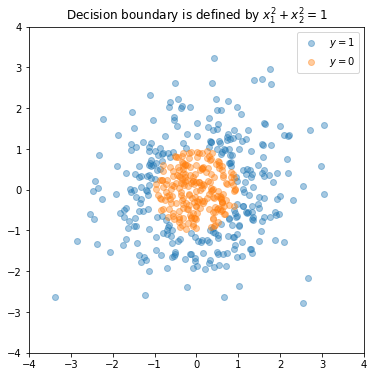

In [3]:
import matplotlib.pyplot as plt

x, y = generate_data(n=500)

mask_pos = (y == 1.)
mask_neg = (y == 0.)

plt.figure(figsize=(6, 6))
plt.scatter(x[mask_pos, 0], x[mask_pos, 1], label=r'$y=1$', alpha=0.4)
plt.scatter(x[mask_neg, 0], x[mask_neg, 1], label=r'$y=0$', alpha=0.4)
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.legend()
plt.title(r'Decision boundary is defined by $x_1^2+x_2^2=1$')
plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression

x_train, y_train = generate_data(n=1000)
x_test, y_test = generate_data(n=1000)

model = LogisticRegression()
model.fit(x_train, y_train)
print('Model accuracy on test data', model.score(x_test, y_test))

Model accuracy on test data 0.627


In [9]:
from tqdm import tqdm_notebook as tqdm

def decision_boundary(predict, delta=0.01):
  # compute the decision boundary of method predict()
  x1_range = np.arange(-2., 2., delta)
  x2_range = np.arange(0., 2., delta)

  boundary = []
  for x1 in x1_range:
  
    i = 0   
    x = np.asarray([x1, 0.]).reshape(1, -1)
    y_ref = predict(x) #model.predict(x)


    x2_found = False
    stop = False
    while not(x2_found) and not(stop):
      x2 = x2_range[i]
      x = np.asarray([x1, x2]).reshape(1, -1)
      y = predict(x) #model.predict(x)
      if y_ref != y:
        x2_found = True
        boundary.append(x)

      i += 1
      if i == x2_range.shape[0]:
        stop = True

  for x1 in x1_range[::-1]:
    i = 0 
    
    x = np.asarray([x1, 0.]).reshape(1, -1)
    y_ref = predict(x) #model.predict(x)
    
    x2_found = False
    stop = False
    while not(x2_found) and not(stop):
      x2 = - x2_range[i]
      x = np.asarray([x1, x2]).reshape(1, -1)
      y = predict(x) #model.predict(x)
      if y_ref != y:
        x2_found = True
        boundary.append(x)

      i += 1
      if i == x2_range.shape[0]:
        stop = True
      
  boundary.append(boundary[0])    
  return np.concatenate(boundary, axis=0)

Number of training samples 20
Model accuracy 0.8363


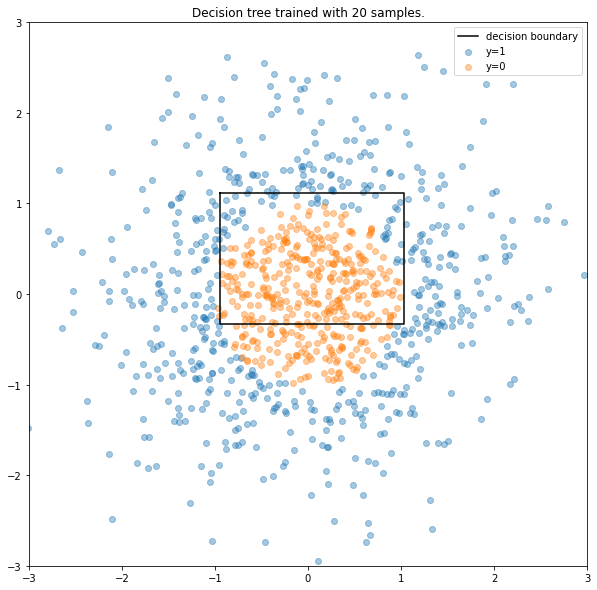

Number of training samples 50
Model accuracy 0.8742


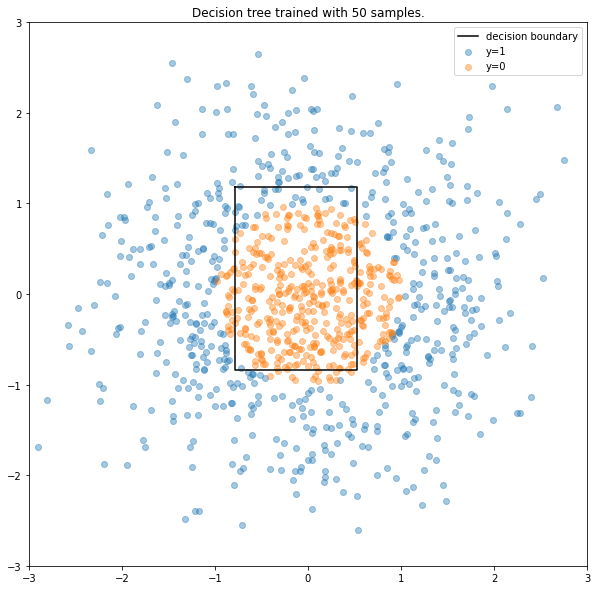

Number of training samples 100
Model accuracy 0.9216


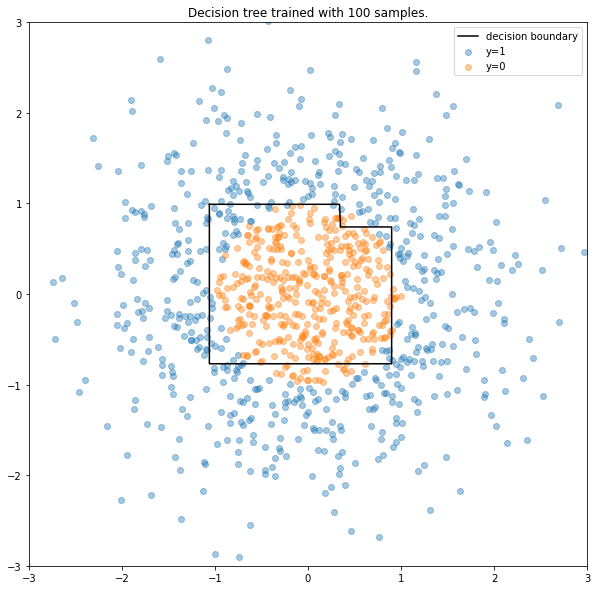

Number of training samples 1000
Model accuracy 0.9787


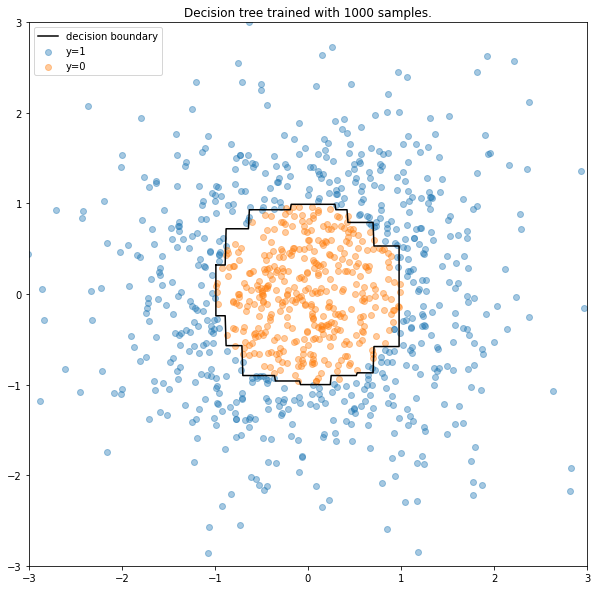

Number of training samples 10000
Model accuracy 0.9911


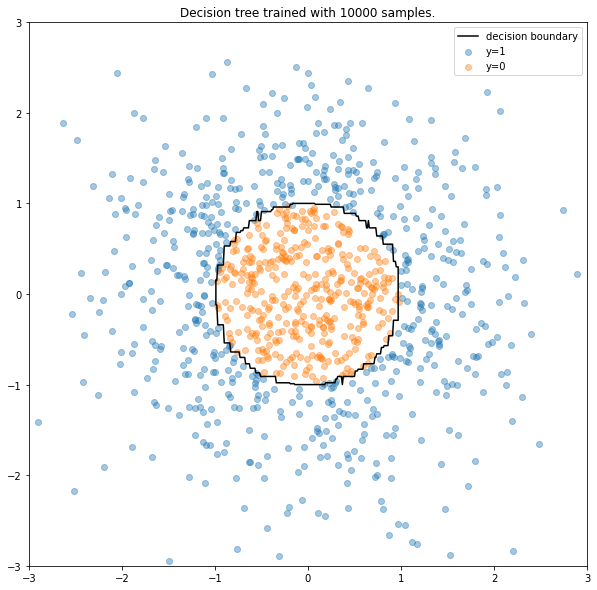

In [16]:
from sklearn.tree import DecisionTreeClassifier


n_range = [20, 50, 100, 1000, 10000] # number of training samples

for n in n_range:
  print('Number of training samples', n)
  x_train, y_train = generate_data(n=n)
  x_test, y_test = generate_data(n=10000)


  model = DecisionTreeClassifier()
  model.fit(x_train, y_train)
  print('Model accuracy', model.score(x_test, y_test))

  boundary = decision_boundary(model.predict, delta=0.01)

  x, y = generate_data(n=1000)

  mask_pos = (y == 1.)
  mask_neg = (y == 0.)

  plt.figure(figsize=(10, 10))
  plt.xlim(-3, 3)
  plt.ylim(-3, 3)
  plt.scatter(x[mask_pos, 0], x[mask_pos, 1], label='y=1', alpha=0.4)
  plt.scatter(x[mask_neg, 0], x[mask_neg, 1], label='y=0', alpha=0.4)
  plt.plot(boundary[:, 0], boundary[:, 1], color='black', label='decision boundary')
  plt.legend()
  plt.title('Decision tree trained with ' + str(n) + ' samples.')
  plt.show()

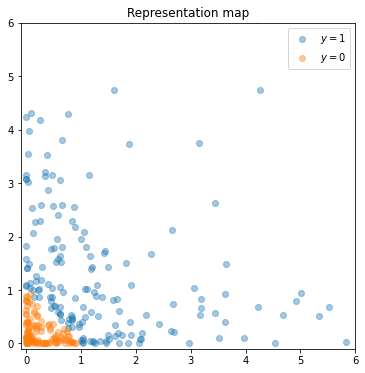

Model accuracy on test data 0.9984


In [13]:
def representation_map(x):
  return x**2


x, y = generate_data(n=300)

mask_pos = (y == 1.)
mask_neg = (y == 0.)

mask_pos = (y == 1.)
mask_neg = (y == 0.)

plt.figure(figsize=(6, 6))
plt.scatter(representation_map(x)[mask_pos, 0], representation_map(x)[mask_pos, 1], label=r'$y=1$', alpha=0.4)
plt.scatter(representation_map(x)[mask_neg, 0], representation_map(x)[mask_neg, 1], label=r'$y=0$', alpha=0.4)
plt.legend()
plt.ylim(-0.1, 6)
plt.xlim(-0.1,6)
plt.title('Representation map')
plt.show()


model = LogisticRegression()
model.fit(representation_map(x_train), y_train)
print('Model accuracy on test data', model.score(representation_map(x_test), y_test))

Model accuracy 0.976


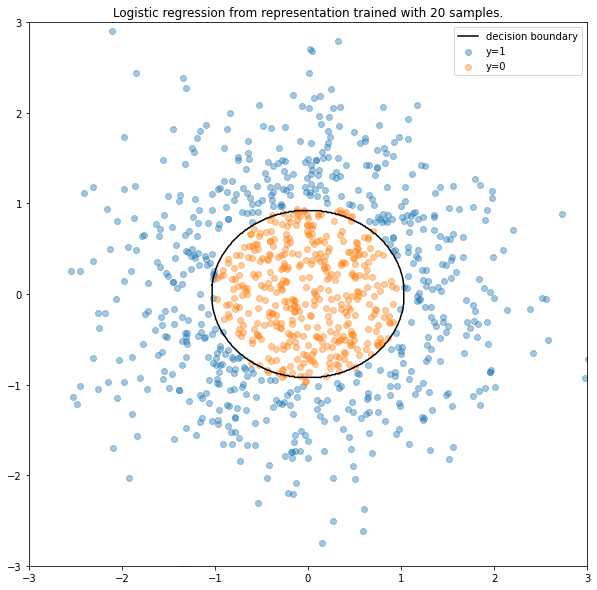

Model accuracy 0.965


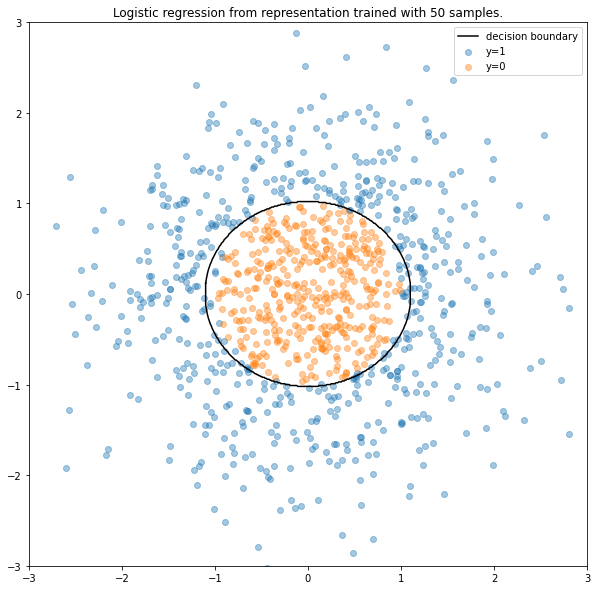

Model accuracy 0.9662


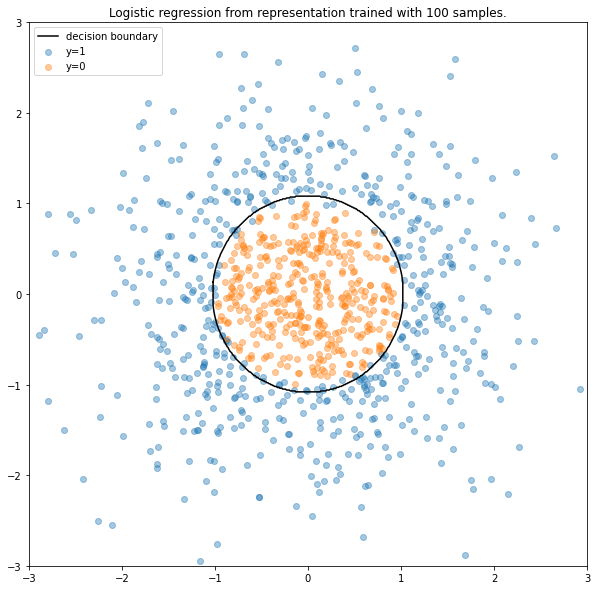

Model accuracy 0.9878


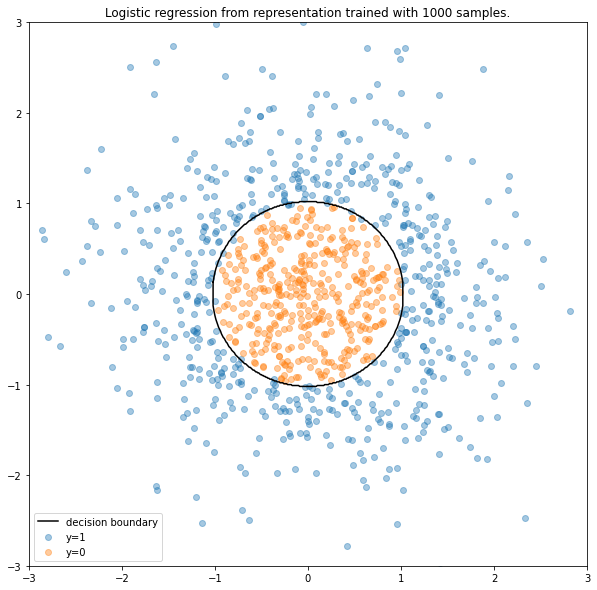

Model accuracy 0.9976


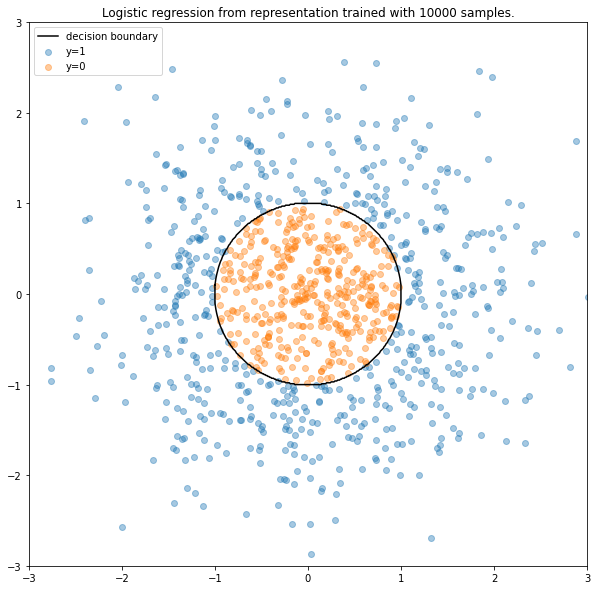

In [15]:
from sklearn.tree import DecisionTreeClassifier


n_range = [20, 50, 100, 1000, 10000]

for n in n_range:
  x_train, y_train = generate_data(n=n)
  x_test, y_test = generate_data(n=10000)


  model = LogisticRegression()
  model.fit(representation_map(x_train), y_train)
  model.score(representation_map(x_test), y_test)
  print('Model accuracy', model.score(representation_map(x_test), y_test))

  boundary = decision_boundary(lambda x: model.predict(representation_map(x)), delta=0.01)

  x, y = generate_data(n=1000)

  mask_pos = (y == 1.)
  mask_neg = (y == 0.)

  plt.figure(figsize=(10, 10))
  plt.xlim(-3, 3)
  plt.ylim(-3, 3)
  plt.scatter(x[mask_pos, 0], x[mask_pos, 1], label='y=1', alpha=0.4)
  plt.scatter(x[mask_neg, 0], x[mask_neg, 1], label='y=0', alpha=0.4)
  plt.plot(boundary[:, 0], boundary[:, 1], color='black', label='decision boundary')
  plt.legend()
  plt.title('Logistic regression from representation trained with ' + str(n) + ' samples.')
  plt.show()

In [ ]:
x_train, y_train = generate_data(n=1000)
x_test, y_test = generate_data(n=1000)


model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)
print('Model accuracy', model.score(x_test, y_test))

boundary = decision_boundary(model.predict, delta=0.01)

x, y = generate_data(n=1000)

mask_pos = (y == 1.)
mask_neg = (y == 0.)

plt.figure(figsize=(10, 10))
plt.scatter(x[mask_pos, 0], x[mask_pos, 1], label='y=1', alpha=0.4)
plt.scatter(x[mask_neg, 0], x[mask_neg, 1], label='y=0', alpha=0.4)
plt.plot(boundary[:, 0], boundary[:, 1], color='black', label='decision boundary')
plt.legend()
plt.title('Decision tree trained with ' + str(n) + ' samples.')
plt.show()

Model accuracy 0.621


IndexError: ignored

Model accuracy 1.0


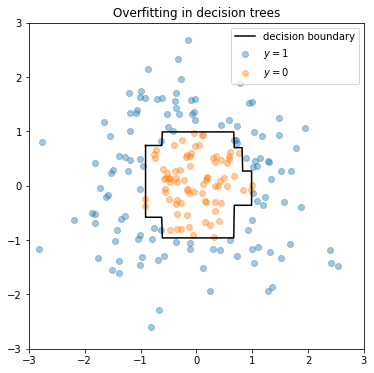

In [ ]:
from sklearn.tree import DecisionTreeClassifier

x, y = generate_data(n=200)
model = DecisionTreeClassifier()
model.fit(x, y)
print('Model accuracy', model.score(x, y))

boundary = decision_boundary(model.predict, delta=0.01)

mask_pos = (y == 1.)
mask_neg = (y == 0.)

plt.figure(figsize=(6, 6))
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter(x[mask_pos, 0], x[mask_pos, 1], label=r'$y=1$', alpha=0.4)
plt.scatter(x[mask_neg, 0], x[mask_neg, 1], label=r'$y=0$', alpha=0.4)
plt.plot(boundary[:, 0], boundary[:, 1], color='black', label='decision boundary')
plt.legend()
plt.title('Overfitting in decision trees')
plt.show()

Model accuracy 0.9666666666666667


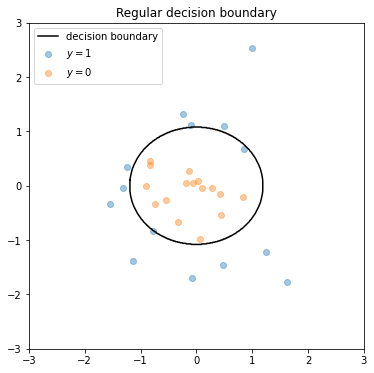

In [ ]:
x, y = generate_data(n=30)


model = LogisticRegression()
model.fit(representation_map(x), y)
print('Model accuracy', model.score(representation_map(x), y))

boundary = decision_boundary(lambda x: model.predict(representation_map(x)), delta=0.01)

mask_pos = (y == 1.)
mask_neg = (y == 0.)

plt.figure(figsize=(6, 6))
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter(x[mask_pos, 0], x[mask_pos, 1], label=r'$y=1$', alpha=0.4)
plt.scatter(x[mask_neg, 0], x[mask_neg, 1], label=r'$y=0$', alpha=0.4)
plt.plot(boundary[:, 0], boundary[:, 1], color='black', label='decision boundary')
plt.legend()
plt.title('Regular decision boundary')
plt.show()

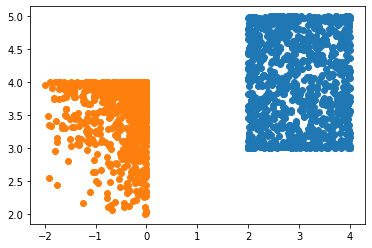